In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR


In [8]:
data = {
    'PIB': [100, 110, 120, 115, 130, 140, 150, 145, 160, 170],
    'Taxa_Desemprego': [5.0, 4.5, 4.2, 4.8, 4.1, 3.9, 3.7, 4.0, 3.5, 3.3]
}

df = pd.DataFrame(data)
df

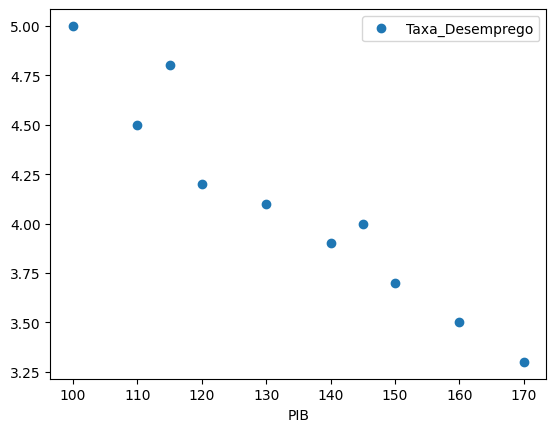

In [13]:
ax = df.plot(x='PIB', y='Taxa_Desemprego', style='o')

### Verificar estacionariedade das séries temporais
 teste Augmented Dickey-Fuller (ADF)

In [14]:
def test_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    
    if p_value <= 0.05:
        print("A série é estacionária.")
    else:
        print("A série não é estacionária.")

test_stationarity(df['PIB'])
test_stationarity(df['Taxa_Desemprego'])

A série não é estacionária.
A série não é estacionária.


### Diferenciação das Séries Temporais (Para as que não são estacionárias)

In [15]:
df['PIB_diff'] = df['PIB'].diff()
df['Taxa_Desemprego_diff'] = df['Taxa_Desemprego'].diff()

# Remover valores NaN resultantes da diferenciação
df = df.dropna()

test_stationarity(df['PIB_diff'])
test_stationarity(df['Taxa_Desemprego_diff'])


A série é estacionária.
A série é estacionária.


In [30]:
df_var = df[['PIB_diff', 'Taxa_Desemprego_diff']]
df_var

,PIB_diff,Taxa_Desemprego_diff
1,10.0,-0.5
2,10.0,-0.3
3,-5.0,0.6
4,15.0,-0.7
5,10.0,-0.2
6,10.0,-0.2
7,-5.0,0.3
8,15.0,-0.5
9,10.0,-0.2


### Ajustar modelo VAR

In [31]:
model = VAR(df_var)
result = model.fit(2)  # 2 é o atraso (número de lags)

print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Oct, 2023
Time:                     16:27:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.22002
Nobs:                     7.00000    HQIC:                  -5.09780
Log likelihood:           4.63447    FPE:                  0.0328314
AIC:                     -4.14275    Det(Omega_mle):       0.0111718
--------------------------------------------------------------------
Results for equation PIB_diff
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                          19.577954        16.354678            1.197           0.231
L1.PIB_diff                    -0.949355         2.230556           -0.426           0.670
L1.Taxa_Desempreg

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
# Fazendo previsões para 2 períodos à frente
forecast = result.forecast(df_var.values, steps=2)

# Exibindo as previsões
print("Previsões:")
print(forecast)

Previsões:
[[-1.96623635  0.21749255]
 [11.58861653 -0.37894128]]


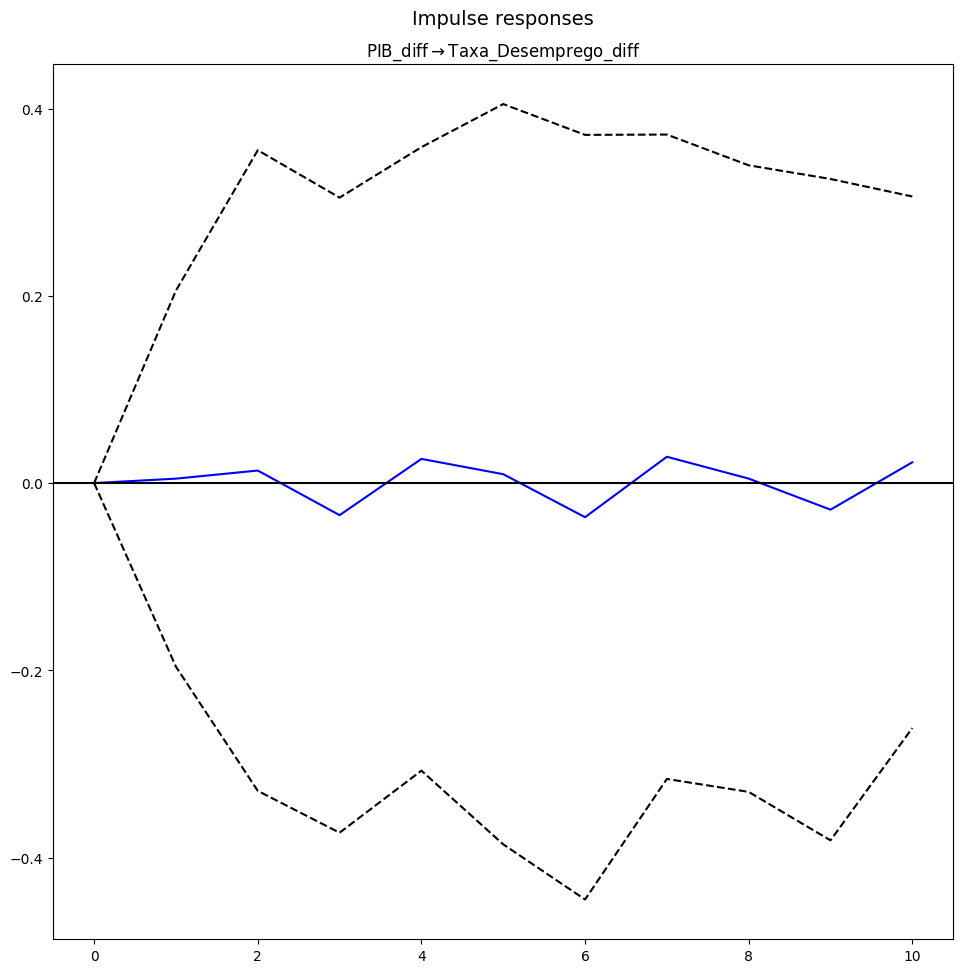

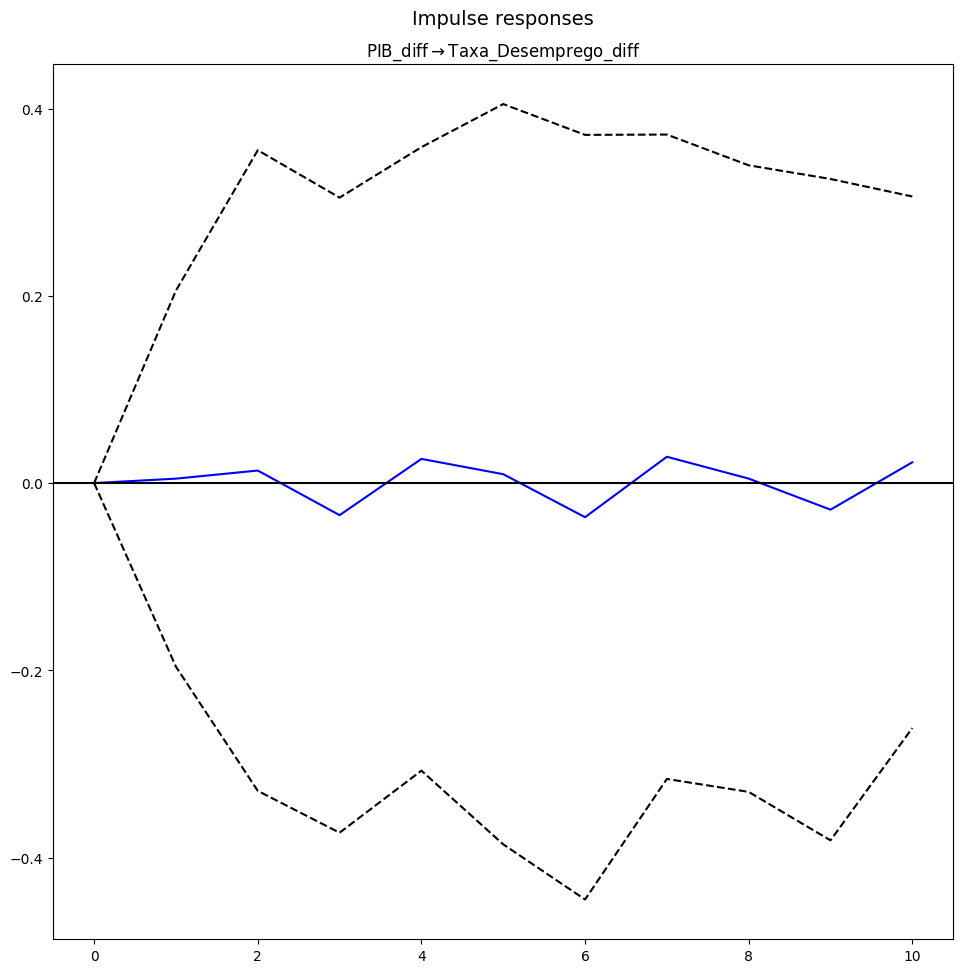

In [36]:
# Analisando o efeito de um choque nas variáveis (por exemplo, um aumento de 10 no PIB)
irf = result.irf(10)
irf.plot(impulse='PIB_diff', response='Taxa_Desemprego_diff')